In [609]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/datas/airport-codes.csv')
df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [610]:
len(df)

57421

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


In [612]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4537
closed             4378
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

Since there's not much data it would be better to over sample it later in the preprocess stage

In [613]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
iso_country       246
iso_region          0
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
coordinates         0
dtype: int64

In [614]:
df[['ISO_Country','ISO_state']] = df['iso_region'].str.split('-',n=1, expand=True)

Since we made a new column for iso_region, we can dop these columns

In [615]:
df.drop(['iso_country','iso_region'], axis= 1, inplace=True)

In [616]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,iata_code,local_code,coordinates,ISO_Country,ISO_state
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",US,PA
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",US,KS
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",US,AK
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",US,AL
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",US,AR


we would have to do the same for coordination

In [617]:
df[['Longitude','Latitude']] = df['coordinates'].str.split(',',n=1,expand=True)

In [618]:
df.drop(['coordinates'],axis=1,inplace=True)

In [619]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,iata_code,local_code,ISO_Country,ISO_state,Longitude,Latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,NaN,00A,US,PA,-74.93360137939453,40.07080078125
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,NaN,00AA,US,KS,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,NaN,00AK,US,AK,-151.695999146,59.94919968
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,NaN,00AL,US,AL,-86.77030181884766,34.86479949951172
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,NaN,US,AR,-91.254898,35.6087


In [620]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

In [621]:
len(df)

57421

Since we already have coordinates and the state names, we dont need iata code which is the location identification code.

In [622]:
df.drop(['iata_code'], axis = 1, inplace=True)

In [623]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,local_code,ISO_Country,ISO_state,Longitude,Latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.93360137939453,40.07080078125
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999146,59.94919968
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.77030181884766,34.86479949951172
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.6087


In [624]:
df['ident'].value_counts()

BR-0898    1
MN05       1
85PA       1
51MN       1
FAUG       1
          ..
DOO        1
1MT9       1
SSSY       1
CEH2       1
ZBSH       1
Name: ident, Length: 57421, dtype: int64

we can see that ident is a primary key column so we can drop that as well. 

In [625]:
df.drop(['ident'], axis = 1, inplace=True)

In [626]:
df.head()

,type,name,elevation_ft,continent,municipality,gps_code,local_code,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.77030181884766,34.86479949951172
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.6087


lets try to fill up NA values

But first, I want to visualize how their elevation feets are like.

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

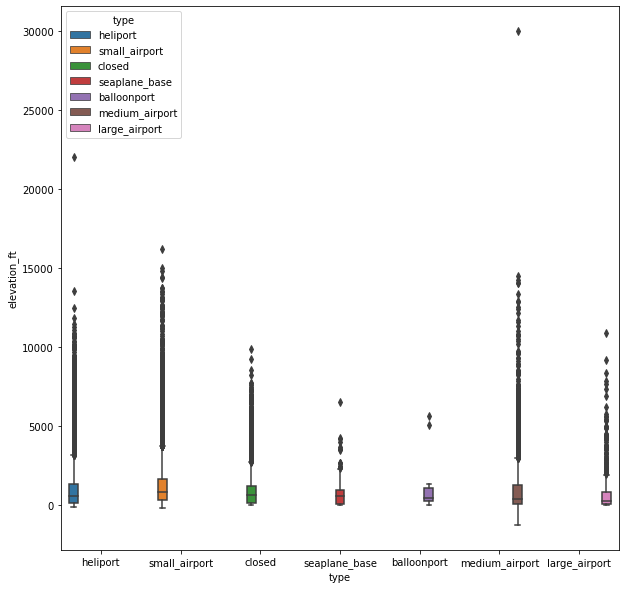

In [627]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data =df, hue = 'type')

In [628]:
df['type'].unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

Let's drop the value that has closed. Closed airports aren't useful for our future analysis.

In [629]:
df.drop(df[df['type'] == 'closed'].index, inplace = True)

In [630]:
data_input = ['heliport', 'small_airport', 'seaplane_base', 'balloonport', 'medium_airport', 'large_airport']

In [631]:
def plot_mean_type(data, airport_types):
    mean_list = []
    for airport_type in airport_types:
        type_mean = np.mean(data[data['type'] == airport_type]['elevation_ft'])
        mean_list.append(type_mean)
    mean_df = pd.DataFrame({'mean_type_airport': mean_list}, index=data_input)
    return mean_df

In [632]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f

,mean_type_airport
heliport,1199.377100
small_airport,1349.811397
seaplane_base,649.716329
balloonport,1089.000000
medium_airport,1059.199724
large_airport,798.062295


In [633]:
mean_df_f.mean_type_airport

heliport          1199.377100
small_airport     1349.811397
seaplane_base      649.716329
balloonport       1089.000000
medium_airport    1059.199724
large_airport      798.062295
Name: mean_type_airport, dtype: float64

<AxesSubplot:ylabel='mean_type_airport'>

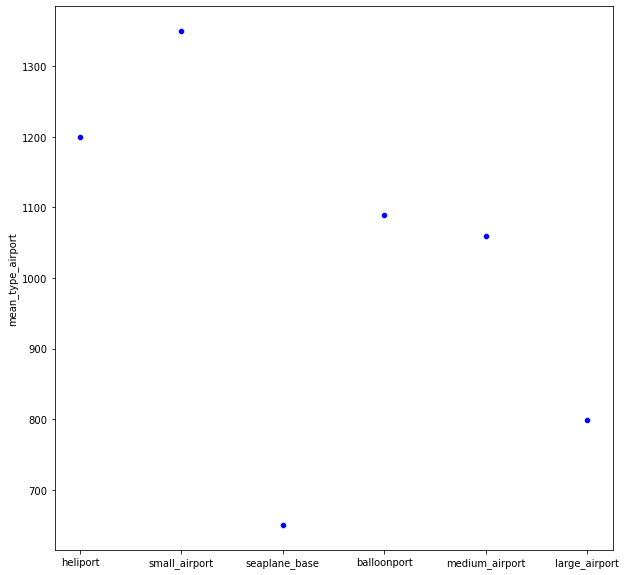

In [634]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = mean_df_f.index, y = mean_df_f.mean_type_airport, data= mean_df_f, color ='b')

We can see the small airport has the most highest mean value for elevation in feet. 

In [635]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f = mean_df_f.reset_index()
mean_df_f

,index,mean_type_airport
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,649.716329
3,balloonport,1089.000000
4,medium_airport,1059.199724
5,large_airport,798.062295


In [636]:
mean_df_f.columns = ['airport','mean_']
mean_df_f

,airport,mean_
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,649.716329
3,balloonport,1089.000000
4,medium_airport,1059.199724
5,large_airport,798.062295


In [637]:
df['elevation_ft'] = df['elevation_ft'].fillna(111)

def filling_na(type_airport, val):
    b = df['type']==type_airport
    df.loc[b,'elevation_ft'] = df.loc[b,'elevation_ft'].replace(111,val)
    

In [638]:
filling_na('heliport',1199.377100)
filling_na('small_airport',1349.811397)
filling_na('seaplane_base',649.716329)
filling_na('balloonport',1089.000000)
filling_na('medium_airport',1059.199724)
filling_na('large_airport',798.062295)


In [639]:
df.isnull().sum()

type                0
name                0
elevation_ft        0
continent       25747
municipality     5237
gps_code        12272
local_code      23596
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

We can see that the elevation feet has no more null values. Let's continue to explore more for others

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

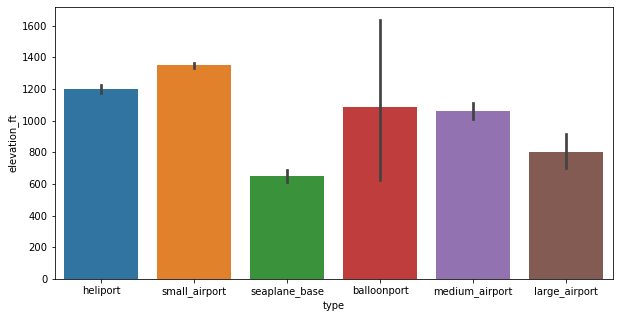

In [640]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'type', y = 'elevation_ft', data = df)

In [641]:
df['continent'].value_counts()

SA    8212
EU    7404
AS    5363
AF    3283
OC    3008
AN      26
Name: continent, dtype: int64

In [642]:
print(len(df['gps_code'].unique()))
print(len(df['local_code'].unique()))

40103
28133


gps_cood and loca_code aren't really useful. We can drop these columns.

If I label encode thse in the future, there owuld be too many columns

In [643]:
df.drop(['gps_code','local_code'], axis= 1, inplace =True)

In [644]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NaN,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NaN,Alex,US,OK,-97.8180194,34.9428028


So all the US has missing values with NaN.

In [645]:
df['continent'].fillna('A',inplace=True)

In [646]:
def fill_continent(country, continent):
    country_data = df['ISO_Country'] == country
    df.loc[country_data,'continent'] = df.loc[country_data,'continent'].replace('A', continent)
    

I filled up NAs with A (temporarily)

And filled up all the country matching their appropriate continent. 

In [647]:
fill_continent('US', 'NA')
fill_continent('CA', 'NA')
fill_continent('MX', 'NA')
fill_continent('CU', 'NA')
fill_continent('CR', 'NA')
fill_continent('GL', 'NA')
fill_continent('HN', 'CA')

In [648]:
df['continent'].value_counts()

NA    25148
SA     8212
EU     7404
AS     5363
AF     3283
OC     3008
A       446
CA      153
AN       26
Name: continent, dtype: int64

We changed all the A to NA - North America.

And other countries and continents as well

While I'm filling up the data I found that there's a country labeled as PA which I would have to drop this since it is a data error.

There are other countries that can be labeled into certain continents but since there's not even 100 data for each of the countries, I will drop all of them.

In [649]:
df[df['continent'] == 'A']['ISO_Country'].value_counts()

PA    69
BS    61
PR    56
GT    52
DO    34
NI    32
SV    25
BZ    24
JM    19
VI     9
TC     8
HT     8
GP     6
VC     5
VG     4
BQ     3
TT     3
KY     3
AG     3
MF     2
LC     2
GD     2
KN     2
DM     2
BB     2
PM     2
SX     1
BL     1
MQ     1
AI     1
BM     1
AW     1
MS     1
CW     1
Name: ISO_Country, dtype: int64

In [650]:
df_2 = df[df.continent != 'A']
df_2.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.8180194,34.9428028


<AxesSubplot:>

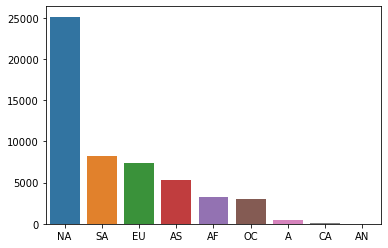

In [651]:
sns.barplot(x = df.continent.value_counts().index, y = df.continent.value_counts().values, data=df)

In [652]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.8180194,34.9428028


<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

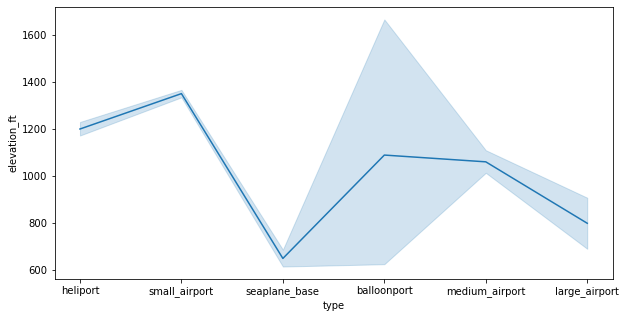

In [653]:
plt.figure(figsize=(10,5))
sns.lineplot(x= 'type' , y = 'elevation_ft', data= df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of elevation')

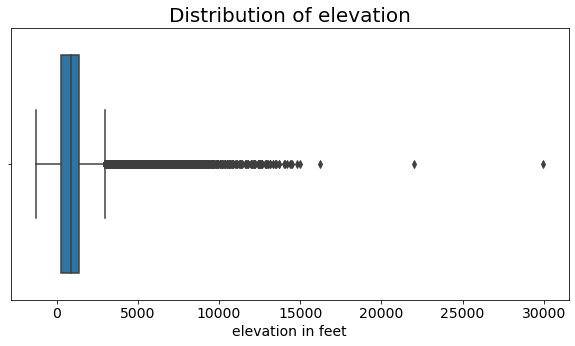

In [654]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(df.elevation_ft)

# notation indicating an outlier
# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('elevation in feet', fontsize=14)
plt.title('Distribution of elevation', fontsize=20)

In [655]:
df[df['elevation_ft'] > 25000]

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
55049,medium_airport,Modi,29977.0,NA,California,US,CA,179.999894,89.999845


The elevation_ft 29977.0 is an outlier because according to google, 
The Leadville Airport is North America's highest public use airport at an altitude of 9,934 feet.

I can not find anything about the elevation feet for modi airport. So I will drop this.

In [656]:
df.drop([55049], axis=0, inplace=True)

In [657]:
df[df['elevation_ft'] > 20000]

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
25164,heliport,Siachen Glacier AFS Airport,22000.0,AS,NaN,IN,JK,77,35.5


In [658]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.8180194,34.9428028


In [659]:
def describe(data, col):
    max_v = data[col].max()
    min_v = data[col].min()
    median_v = data[col].median()
    mean_v = data[col].mean()
    return "Max: {}".format(max_v), "Min: {}".format(min_v), "Median: {}".format(median_v), "Mean: {}".format(mean_v)
    

In [660]:
describe(df,'elevation_ft')

('Max: 22000.0', 'Min: -1266.0', 'Median: 879.0', 'Mean: 1270.574942221069')

In [661]:
below_avg = []
above_avg = []
for val in df['elevation_ft']:
    if val > 1231:
        above_avg.append(val)
    else:
        below_avg.append(val)

In [662]:
print(len(below_avg))
len(above_avg)

34376


18666

Seems like people build airports in lower elevated place than higher. Why is this?

Text(0.5, 1.0, 'elevation_feet per type')

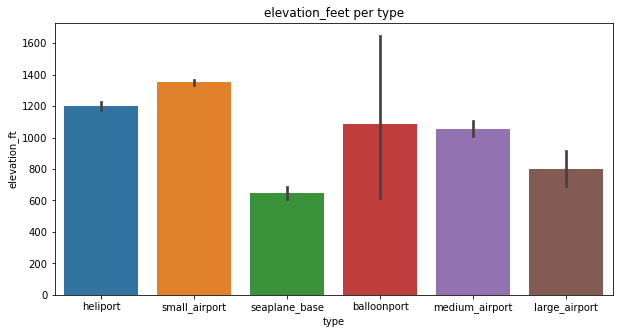

In [663]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'type', y = 'elevation_ft', data=df)
plt.title('elevation_feet per type')

In [664]:
df['Longitude'].astype(str).astype(float)
df['Latitude'].astype(str).astype(float)

0        40.070801
1        38.704022
2        59.949200
3        34.864799
5        34.942803
           ...    
57416    40.542524
57417    41.784401
57418    51.894444
57419   -11.584278
57420    30.784722
Name: Latitude, Length: 53042, dtype: float64

In [670]:
df.isnull().sum()

type               0
name               0
elevation_ft       0
continent          0
municipality    5237
ISO_Country        0
ISO_state          0
Longitude          0
Latitude           0
dtype: int64

Not an outlier

In [671]:
df[df['municipality'].isnull()]

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
1550,heliport,Watertown / Brownlee Heliport,1720.000000,NA,NaN,US,SD,-97.1080899239,44.883264878199995
2459,heliport,Nordman / Phillabaum Heliport,2440.000000,NA,NaN,US,ID,-116.871174574,48.631483378700004
4417,seaplane_base,Peru / Destiny Cove SPB,580.000000,NA,NaN,US,ME,-70.396957,44.460597
7690,small_airport,Zadow Airstrip,1349.811397,NA,NaN,US,TX,-95.954353809,29.991738550900003
7926,small_airport,Gun Barrel City Airpark,385.000000,NA,NaN,US,TX,-96.1456650496,32.3551499558
...,...,...,...,...,...,...,...,...,...
57358,small_airport,Sengwa Research Area Airstrip,1349.811397,AF,NaN,ZW,MN,28.215618,-18.165196
57359,small_airport,Gokwe North Airport,1349.811397,AF,NaN,ZW,MI,28.330871,-17.537114
57362,small_airport,Chipinge Farm Airstrip,1349.811397,AF,NaN,ZW,MV,32.203607,-20.460575
57363,small_airport,Turwi River Airstrip,1349.811397,AF,NaN,ZW,MV,32.10904,-20.395009


In [672]:
ar_1 = df['municipality'].value_counts().values

In [673]:
z=0
for i in ar_1:
    if i == 1:
        z+= 1
z       

19741

In [674]:
df.drop(['name','municipality'], axis=1)

,type,elevation_ft,continent,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,11.000000,NA,US,PA,-74.93360137939453,40.07080078125
1,small_airport,3435.000000,NA,US,KS,-101.473911,38.704022
2,small_airport,450.000000,NA,US,AK,-151.695999146,59.94919968
3,small_airport,820.000000,NA,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,1100.000000,NA,US,OK,-97.8180194,34.9428028
...,...,...,...,...,...,...,...
57416,medium_airport,0.000000,AS,CN,21,122.3586,40.542524
57417,medium_airport,1059.199724,AS,CN,21,123.49600219726562,41.784400939941406
57418,heliport,40.000000,EU,GB,ENG,1.4825,51.894444
57419,small_airport,11.000000,AF,TF,U-A,47.296388888900005,-11.584277777799999


There are too many unqiue values for municipality column.

In [675]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.8180194,34.9428028


In [676]:
df.groupby('type')['elevation_ft'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
balloonport,24.0,1089.000000,1377.878205,37.0,322.50,940.000000,1089.0000,5624.0
heliport,12028.0,1199.739048,1574.350775,-117.0,200.00,808.000000,1199.3771,22000.0
large_airport,616.0,799.177656,1369.507381,-11.0,59.00,283.000000,816.5000,10860.0
medium_airport,4536.0,1053.869741,1639.493031,-1266.0,85.00,428.500000,1175.0000,14472.0
seaplane_base,1030.0,649.716329,602.566845,-1.0,134.75,649.716329,890.0000,6534.0
small_airport,34808.0,1350.131706,1501.021729,-210.0,367.00,978.000000,1478.0000,16200.0


In [677]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.8180194,34.9428028


seaplane_base and large_airport has lower elevation level

In [678]:
df.drop(df[df['type']=='closed'].index,inplace=True)

In [679]:
df.head()

,type,name,elevation_ft,continent,municipality,ISO_Country,ISO_state,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.93360137939453,40.07080078125
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999146,59.94919968
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.77030181884766,34.86479949951172
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.8180194,34.9428028


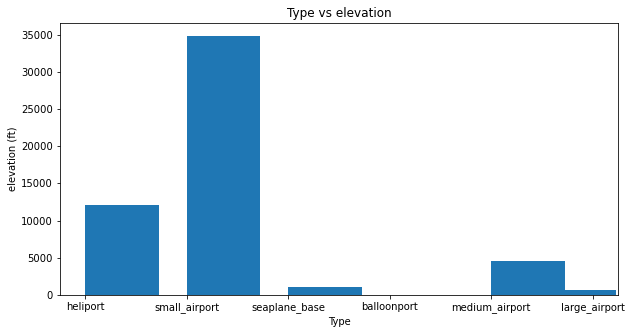

In [680]:
plt.figure(figsize=(10,5))
plt.hist(df['type'], width = 0.725, bins = 10)
plt.title('Type vs elevation')
plt.xlabel('Type')
plt.ylabel('elevation (ft)')
plt.show()

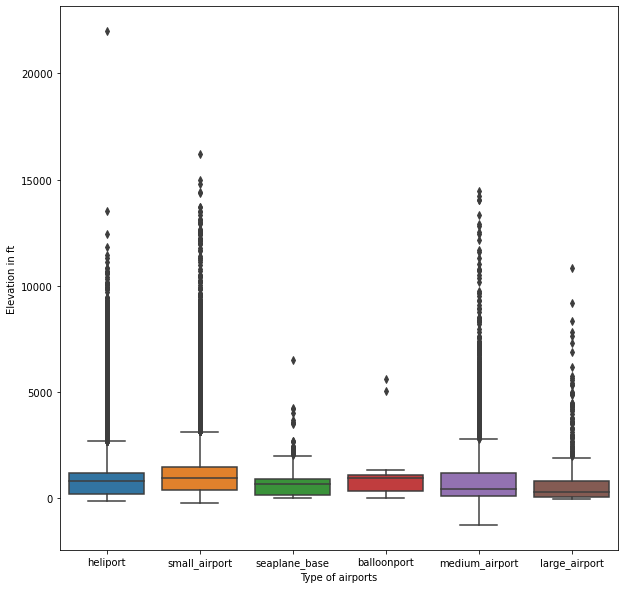

In [681]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data=df)
plt.xlabel('Type of airports')
plt.ylabel('Elevation in ft')
plt.show()

There are still few outliers but I identified them as true values. Not fraud

In [682]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(data)+1)/len(data)
    return x,y

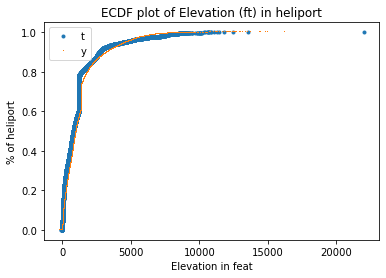

In [683]:
hx,hy = ecdf(df['elevation_ft'][df.type == 'heliport'])
smx,smy = ecdf(df['elevation_ft'][df.type == 'small_airport'])
plt.plot(hx,hy,marker='.',linestyle='none')
plt.plot(smx,smy, marker=',', linestyle = 'none')
plt.title('ECDF plot of Elevation (ft) in heliport')
plt.xlabel('Elevation in feat')
plt.ylabel('% of heliport')
plt.legend('type')
plt.show()